<a href="https://drive.google.com/file/d/1n7Pj2IQd9rrED4miEZHCYje22P_yCYIA/view?usp=sharing" target="_blank" >
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

In [35]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
%matplotlib inline


In [36]:
# Function to get the MNIST data
def get_data():

  # Load the MNIST data from keras datasets
  (_,_), (X, y) = keras.datasets.mnist.load_data()

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=10)
  
  # Get indices of train and test data where label is either 4 or 9
  train_filter = np.where((y_train == 4) | (y_train == 9))[0]
  test_filter = test_filter = np.where((y_test == 4) | (y_test == 9))[0]  

  # Get only the data consiting of 4s and 9s
  X_train, y_train, X_test, y_test = X_train[train_filter], y_train[train_filter],X_test[test_filter], y_test[test_filter]

  # Reduce the number of train data points by 50%
  n_train = X_train.shape[0]
  n_train_half = int(n_train / 2)
  random_indices = np.random.choice(n_train, n_train_half, replace=False)
  X_train = X_train[random_indices]
  y_train = y_train[random_indices]

  # Helper code to replace 9's with label 1 and 4's with label 0 for train data
  get_nine = np.where((y_train == 9))
  y_train = np.zeros(y_train.shape)
  y_train[get_nine] = 1

  # Helper code to replace 9's with label 1 and 4's with label 0 for test data
  get_nine = np.where((y_test == 9))
  y_test = np.zeros(y_test.shape)
  y_test[get_nine] = 1

  return X_train, X_test, y_train, y_test
  

In [37]:
# Call the function get_data to get the train and test data points
X_train, X_test, y_train, y_test = get_data()


In [38]:
# Split the train data into train and validation set 
# with 70% train data and random state as 40
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=40, test_size=0.3)


In [39]:
# Take a quick look at the shape of the train, validation and test data
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape


((74, 28, 28), (74,), (1776, 28, 28), (1776,), (33, 28, 28), (33,))

In [40]:
# # Plot any 9 images from the train data along with their labels
# # ** Your code here **
# for img,label in zip(X_train[0:9],y_train[0:9]):
#     plt.imshow(img, cmap='gray')
#     plt.title(f'label {label}')
#     plt.show()


In [41]:
# Define a simple neural network with 3 dense layers each 
# with 200 nodes and 'relu' activation
my_model = Sequential()
my_model.add(Flatten())
my_model.add(Dense(200, input_dim=1, activation='relu'))
my_model.add(Dense(200, activation='relu'))
my_model.add(Dense(200, activation='relu'))
my_model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross entropy and Adam 
# Use accuracy as the metric
my_model.compile(
    loss = 'binary_crossentropy', # tf.keras.losses.BinaryCrossentropy(),
    optimizer = 'adam', # tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model on the train and validation data for 1000 epochs 
# with batch size of 64 
EPOCHS = 1000
history = my_model.fit(X_train,y_train, validation_data=(X_val, y_val),
        epochs = EPOCHS,
        batch_size = 64,
        )


Epoch 1/1000
2/2 [==============================] - 3s 755ms/step - loss: 23.3503 - accuracy: 0.5541 - val_loss: 27.9296 - val_accuracy: 0.5758
Epoch 2/1000
2/2 [==============================] - 0s 112ms/step - loss: 31.1029 - accuracy: 0.5000 - val_loss: 7.9200 - val_accuracy: 0.5758
Epoch 3/1000
2/2 [==============================] - 0s 87ms/step - loss: 5.4673 - accuracy: 0.7838 - val_loss: 23.0630 - val_accuracy: 0.4242
Epoch 4/1000
2/2 [==============================] - 0s 88ms/step - loss: 9.6137 - accuracy: 0.6351 - val_loss: 7.0960 - val_accuracy: 0.6667
Epoch 5/1000
2/2 [==============================] - 0s 72ms/step - loss: 1.7544 - accuracy: 0.9189 - val_loss: 0.6469 - val_accuracy: 0.8788
Epoch 6/1000
2/2 [==============================] - 0s 82ms/step - loss: 0.9713 - accuracy: 0.9189 - val_loss: 4.8806 - val_accuracy: 0.7879
Epoch 7/1000
2/2 [==============================] - 0s 66ms/step - loss: 4.9642 - accuracy: 0.6757 - val_loss: 1.7735 - val_accuracy: 0.7879
Epoch 8

KeyboardInterrupt: 

C:\Users\Ray\AppData\Local\Temp\ipykernel_20268\2011090585.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


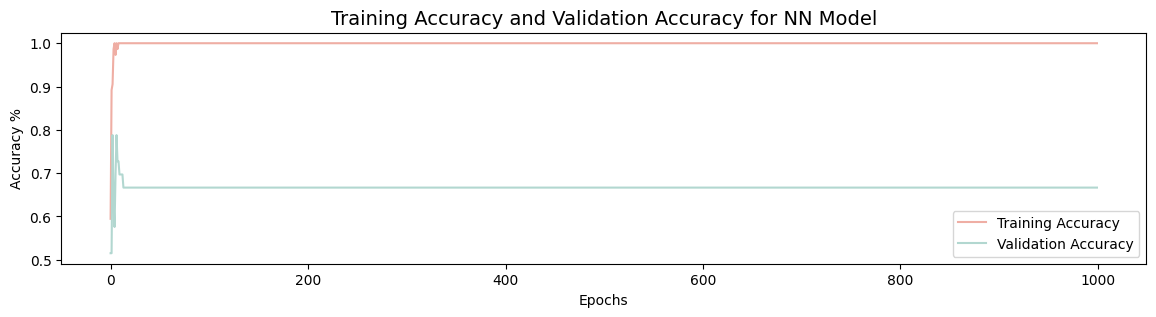

In [ ]:
# Get the trace plot of the model training
fig = plt.figure(num=1, figsize = (14,3))
ax = fig.gca()
ax.plot(history.history['accuracy'],color='#EFAEA4',label = 'Training Accuracy')
ax.plot(history.history['val_accuracy'],color='#B2D7D0',label = 'Validation Accuracy')
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy %')
ax.set_title('Training Accuracy and Validation Accuracy for NN Model', fontsize = 14)
fig.show()


In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
# Compute and print the accuracy of the unregularized model
pred_test = my_model.predict(X_test)

print("model test roc_auc_score :", roc_auc_score(y_test, pred_test))
print('model test accuracy:', accuracy_score(y_test, pred_test.round()))


56/56 [==============================] - 0s 8ms/step
model test roc_auc_score : 0.8762518726556128
model test accuracy: 0.8226351351351351


## REGULARIZED NETWORK

Use the same model definition as given before in the unregularized definition.

Perform any type of regularization techniques (you can mix multiple methods as well) to get a better accuracy as compared to the unregularized model.

In [42]:
# Call the function get_data to get the train and test data points
X_train, X_test, y_train, y_test = get_data()


In [43]:
from keras import regularizers
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

In [53]:
# Define your regularized model
# The model should be the same as the unregularized with 
# additional regularization techniques

r_model = Sequential()
r_model.add(tf.keras.layers.Flatten())
r_model.add(Dense(200, input_dim=1,kernel_regularizer=regularizers.l1(0.01)))
r_model.add(BatchNormalization())
r_model.add(Activation(activation='relu'))
r_model.add(Dense(200, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
r_model.add(Dense(200, activation='relu',kernel_regularizer=regularizers.l1(0.01)))
r_model.add(Dropout(0.2))
r_model.add(Dense(1, activation='sigmoid'))
earlystop = EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True)

r_model.compile(
    loss = 'binary_crossentropy', # tf.keras.losses.BinaryCrossentropy(),
    optimizer = 'adam', # tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

r_history = r_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = EPOCHS, batch_size = 64, callbacks=[earlystop])


Epoch 1/1000
2/2 [==============================] - 4s 518ms/step - loss: 87.8466 - accuracy: 0.5327 - val_loss: 84.6832 - val_accuracy: 0.7273
Epoch 2/1000
2/2 [==============================] - 0s 113ms/step - loss: 83.8856 - accuracy: 0.7383 - val_loss: 80.9033 - val_accuracy: 0.6667
Epoch 3/1000
2/2 [==============================] - 0s 131ms/step - loss: 80.0938 - accuracy: 0.8505 - val_loss: 77.3185 - val_accuracy: 0.6364
Epoch 4/1000
2/2 [==============================] - 0s 141ms/step - loss: 76.3793 - accuracy: 0.9065 - val_loss: 73.6994 - val_accuracy: 0.6970
Epoch 5/1000
2/2 [==============================] - 0s 136ms/step - loss: 72.7923 - accuracy: 0.9252 - val_loss: 70.1644 - val_accuracy: 0.6970
Epoch 6/1000
2/2 [==============================] - 0s 102ms/step - loss: 69.2980 - accuracy: 0.9346 - val_loss: 66.7504 - val_accuracy: 0.6970
Epoch 7/1000
2/2 [==============================] - 0s 169ms/step - loss: 65.9144 - accuracy: 0.9439 - val_loss: 63.4398 - val_accuracy:

C:\Users\Ray\AppData\Local\Temp\ipykernel_20268\736103549.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


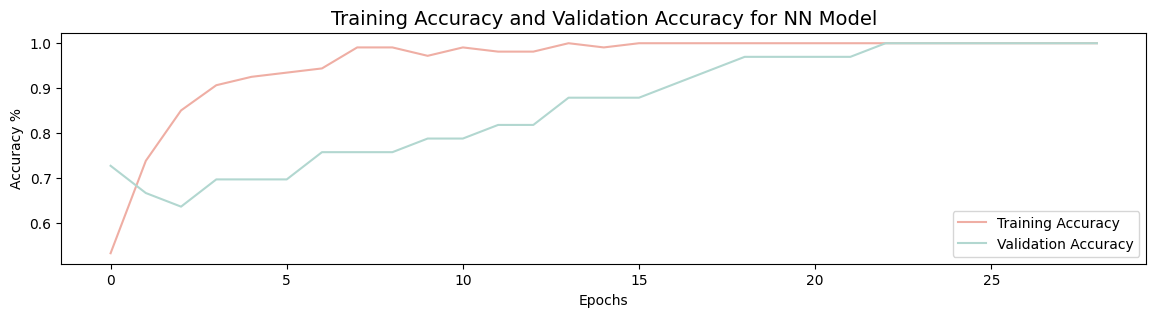

In [54]:
# Get the trace plot of the model training
fig = plt.figure(num=1, figsize = (14,3))
ax = fig.gca()
ax.plot(r_history.history['accuracy'],color='#EFAEA4',label = 'Training Accuracy')
ax.plot(r_history.history['val_accuracy'],color='#B2D7D0',label = 'Validation Accuracy')
ax.legend()
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy %')
ax.set_title('Training Accuracy and Validation Accuracy for NN Model', fontsize = 14)
fig.show()


In [55]:
# Compute and print the accuracy of the regularized model
pred_test = r_model.predict(X_test)

print("model test roc_auc_score :", roc_auc_score(y_test, pred_test))
print('model test accuracy:', accuracy_score(y_test, pred_test.round()))


56/56 [==============================] - 0s 5ms/step
model test roc_auc_score : 0.9703241961693174
model test accuracy: 0.9138513513513513
